<a href="https://colab.research.google.com/github/Jarjoshi273/AIR_QUALITY_INDEX/blob/master/emmotion_recognotion_vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
#from keras.applications.resnet50 import ResNet50
#from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [5]:
invedia-smi

NameError: ignored

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#resize all images
IMAGE_SIZE = [224, 224]

In [8]:
#Preprocessing of data
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale=1./255)


In [9]:
train_path = '/content/drive/MyDrive/DL_dataset/DL_dataset/eINTERFACE_2021_Image/train'

In [10]:
valid_path = '/content/drive/MyDrive/DL_dataset/DL_dataset/eINTERFACE_2021_Image/test'

In [11]:
vgg=VGG16( include_top=False, weights="imagenet",  input_shape=(224, 224,3))
    


58900480/58889256 [==============================] - 0s 0us/step


In [12]:
folders = glob('/content/drive/MyDrive/DL_dataset/DL_dataset/eINTERFACE_2021_Image/train/*')

In [ ]:
folders

['/content/drive/MyDrive/DL_dataset/DL_dataset/eINTERFACE_2021_Image/train/Happiness',
 '/content/drive/MyDrive/DL_dataset/DL_dataset/eINTERFACE_2021_Image/train/Fear',
 '/content/drive/MyDrive/DL_dataset/DL_dataset/eINTERFACE_2021_Image/train/Disgust',
 '/content/drive/MyDrive/DL_dataset/DL_dataset/eINTERFACE_2021_Image/train/Anger',
 '/content/drive/MyDrive/DL_dataset/DL_dataset/eINTERFACE_2021_Image/train/Sadness',
 '/content/drive/MyDrive/DL_dataset/DL_dataset/eINTERFACE_2021_Image/train/Surprise']

In [13]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [14]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False
  


In [15]:
x = Flatten()(vgg.output)

In [16]:
prediction = Dense(len(folders), activation='softmax')(x)

In [17]:
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [18]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [19]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [20]:
test_datagen = ImageDataGenerator(rescale = 1./255)


In [21]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/DL_dataset/DL_dataset/eINTERFACE_2021_Image/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 11478 images belonging to 6 classes.


In [22]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/DL_dataset/DL_dataset/eINTERFACE_2021_Image/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 1438 images belonging to 6 classes.


In [23]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
359/359 [==============================] - 3674s 10s/step - loss: 1.8404 - accuracy: 0.3007 - val_loss: 1.4498 - val_accuracy: 0.4291
Epoch 2/25
359/359 [==============================] - 155s 433ms/step - loss: 1.3854 - accuracy: 0.4707 - val_loss: 1.1432 - val_accuracy: 0.5793
Epoch 3/25
359/359 [==============================] - 156s 434ms/step - loss: 1.2446 - accuracy: 0.5214 - val_loss: 1.1718 - val_accuracy: 0.5334
Epoch 4/25
359/359 [==============================] - 155s 433ms/step - loss: 1.1333 - accuracy: 0.5618 - val_loss: 1.0650 - val_accuracy: 0.5800
Epoch 5/25
359/359 [==============================] - 155s 433ms/step - loss: 1.0693 - accuracy: 0.5964 - val_loss: 1.1491 - val_accuracy: 0.5647
Epoch 6/25
359/359 [==============================] - 155s 433ms/step - loss: 1.0455 - accuracy: 0.6056 - val_loss: 1.0585 - val_accuracy: 0.5967
Epoch 7/25
359/359 [==============================] - 155s 432ms/step - loss: 0.9841 - accuracy: 0.6238 - val_loss: 0.9433 - 

In [24]:
!nvidia-smi

Fri Jun  4 11:29:59 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P0    28W /  70W |   9136MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

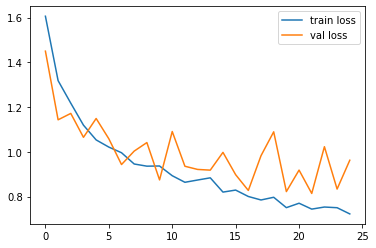

KeyError: ignored

<Figure size 432x288 with 0 Axes>

In [25]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')




In [30]:
import tensorflow as tf



model.save('/content/drive/MyDrive/my_model_emmotion.h5')




In [31]:
import tensorflow as tf
from keras.models import load_model
#new_model = models.load_model('my_model.h5')
model = load_model('/content/drive/MyDrive/my_model_emmotion.h5')

In [29]:
from google.colab import files
files.download("/content/drive/MyDrive/my_model_emmotion.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
training_set.class_indices

{'Anger': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happiness': 3,
 'Sadness': 4,
 'Surprise': 5}

In [33]:
from keras.models import load_model
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('/content/drive/MyDrive/DL_dataset/DL_dataset/eINTERFACE_2021_Image/test/Happiness/myvideo_frames0_jpg.rf.46e286792b4b5d7ce6dd0a28bd68cdb6.jpg',
                              target_size=(224, 224))
test_image = image.img_to_array(test_image)
# print(test_image)
test_image = np.expand_dims(test_image, axis=0)
model = load_model('/content/drive/MyDrive/my_model_emmotion.h5')
result = model.predict(test_image)
# training_set.class_indices
if result[0][1] == 1:
    prediction = 'Disgust'

    print(prediction)
    #return (devansh)

elif result[0][0] == 1:

    prediction = 'Anger'
    print(prediction)
    #return(prediction)
elif result[0][2] == 1:

    prediction = 'Fear'
    print(prediction)

elif result[0][3] == 1:

    prediction = 'Happiness'
    print(prediction)

elif result[0][4] == 1:

    prediction = 'Sadness'
    print(prediction)


else:

    prediction = 'Surprise'
    #return(prediction)
    print(prediction)




Happiness
